<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/ansalnaSOHandRUL05a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [101]:
import pandas as pd

In [102]:
data=pd.read_csv("/content/file1.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [103]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


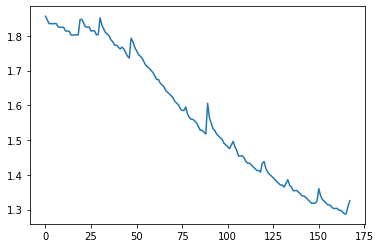

In [104]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [105]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [106]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

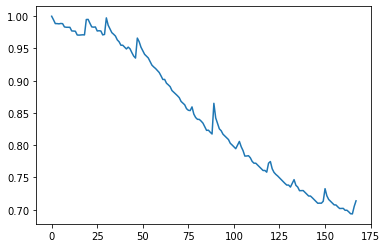

In [107]:
plt.plot(range(len(soh)),soh)
plt.show()

In [108]:
capacity=np.asarray(capacity)

In [109]:
type(capacity)

numpy.ndarray

In [110]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [111]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [112]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.6368
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0622
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0449
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.0406
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0116
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0125
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 8.1427e-04


In [113]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [115]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 5ms/step


0.00013078023764420118

In [116]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.011


In [117]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.00922184]
R2_score:  0.8262329872113001


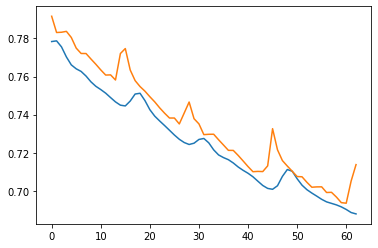

In [118]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [119]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [120]:
preds

array([[0.94307876],
       [0.9415657 ],
       [0.9412827 ],
       [0.94098973],
       [0.93974644],
       [0.9380146 ],
       [0.936798  ],
       [0.93605924],
       [0.9346515 ],
       [0.93283784],
       [0.9312149 ],
       [0.9294215 ],
       [0.92751676],
       [0.92632896],
       [0.92612696],
       [0.9277567 ],
       [0.9335222 ],
       [0.94055736],
       [0.94358754],
       [0.94152963],
       [0.9385127 ],
       [0.93664086],
       [0.9349058 ],
       [0.93307686],
       [0.9314656 ],
       [0.9297061 ],
       [0.9296067 ],
       [0.93404084],
       [0.9387574 ],
       [0.93866205],
       [0.9342715 ],
       [0.9299913 ],
       [0.92671824],
       [0.92345023],
       [0.9198736 ],
       [0.9163475 ],
       [0.91363347],
       [0.9115554 ],
       [0.9099006 ],
       [0.90892667],
       [0.908054  ],
       [0.90589637],
       [0.90218747],
       [0.90049034],
       [0.9052659 ],
       [0.9120961 ],
       [0.9140169 ],
       [0.910

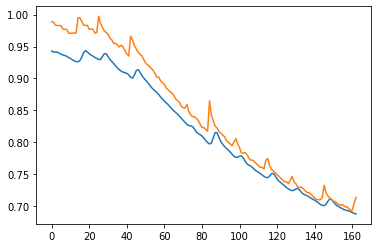

In [121]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [122]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [123]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 2.5350
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.5025
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.4376
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1181
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0281
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0323
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0250
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0098
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0124


In [124]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [125]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.004811853894653609

In [126]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.069


In [127]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.06821583]
R2_score:  -0.8550414724837605


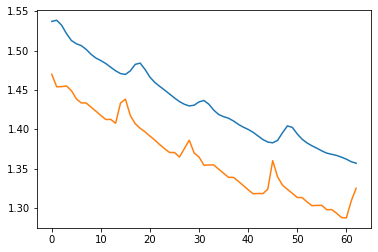

In [128]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [129]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [130]:
preds

array([[1.864256 ],
       [1.8612206],
       [1.8607063],
       [1.8602936],
       [1.8579557],
       [1.8542714],
       [1.8517606],
       [1.8504972],
       [1.8478446],
       [1.8439769],
       [1.840826 ],
       [1.8374637],
       [1.8333924],
       [1.830924 ],
       [1.8305992],
       [1.8331866],
       [1.8440666],
       [1.8593729],
       [1.8660624],
       [1.861532 ],
       [1.8551749],
       [1.851597 ],
       [1.8483601],
       [1.8444308],
       [1.8413345],
       [1.8380207],
       [1.8367684],
       [1.8452406],
       [1.8563876],
       [1.8563182],
       [1.8470373],
       [1.8384433],
       [1.8320333],
       [1.825655 ],
       [1.818468 ],
       [1.8113915],
       [1.8058419],
       [1.8018214],
       [1.7984521],
       [1.7963364],
       [1.7949592],
       [1.7909049],
       [1.7833863],
       [1.7788905],
       [1.787646 ],
       [1.8031282],
       [1.8075361],
       [1.7990415],
       [1.7885659],
       [1.7803569],


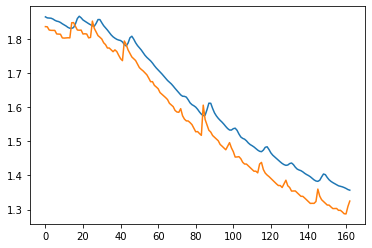

In [131]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()